In [2]:
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt
import labellines as ll

# Manually choose $x_0\sim x_T$

In [3]:
T = 8
x = np.array([[0,0],[0,1],[1,1],[2,1],[2,2],[2,3],[3,3],[4,3],[4,4]])

## Calculate $r_{ij}$ matrix

In [4]:
R=np.linalg.norm(x[:,np.newaxis,:]-x,axis=-1)

In [5]:
print(R)

[[0.         1.         1.41421356 2.23606798 2.82842712 3.60555128
  4.24264069 5.         5.65685425]
 [1.         0.         1.         2.         2.23606798 2.82842712
  3.60555128 4.47213595 5.        ]
 [1.41421356 1.         0.         1.         1.41421356 2.23606798
  2.82842712 3.60555128 4.24264069]
 [2.23606798 2.         1.         0.         1.         2.
  2.23606798 2.82842712 3.60555128]
 [2.82842712 2.23606798 1.41421356 1.         0.         1.
  1.41421356 2.23606798 2.82842712]
 [3.60555128 2.82842712 2.23606798 2.         1.         0.
  1.         2.         2.23606798]
 [4.24264069 3.60555128 2.82842712 2.23606798 1.41421356 1.
  0.         1.         1.41421356]
 [5.         4.47213595 3.60555128 2.82842712 2.23606798 2.
  1.         0.         1.        ]
 [5.65685425 5.         4.24264069 3.60555128 2.82842712 2.23606798
  1.41421356 1.         0.        ]]


## Define and solve the localization SDP

In [52]:
# The achor points: x_0 and x_1, are assumed to be known.
# x_0 = x[0,:]
# x_1 = x[1,:]
# x_2 = x[2,:]

# Initialize the decision variables
x_hat = cp.Variable((T+1,2))

# Define the anchor point constraints
# constraints = [x_hat[0,:]==x_0,x_hat[1,:]==x_1,x_hat[5,:]==x[5,:]]
constraints = [x_hat[:3,:]==x[:3,:],x_hat[6:,:]==x[6:,:]]

# Define the pairwise distance constraints(hard)
R_hat = cp.vstack([cp.norm(x_hat-x_hat[i:i+1,:],axis=1) for i in range(T+1)])

In [53]:
constraints.append(R_hat <= R)

In [54]:
# prob = cp.Problem(cp.Minimize(cp.sum_squares(R_hat-R)),constraints)
prob = cp.Problem(cp.Minimize(0),constraints)


In [55]:
prob.solve()

0.0

In [56]:
cp.norm(R_hat-R,'fro').value

1.5466548709962595

In [57]:
x_hat.value

array([[9.86317308e-14, 9.90194269e-14],
       [1.10550136e-16, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00],
       [1.64871456e+00, 1.47858789e+00],
       [2.00000000e+00, 2.00000000e+00],
       [2.35128545e+00, 2.52141209e+00],
       [3.00000000e+00, 3.00000000e+00],
       [4.00000000e+00, 3.00000000e+00],
       [4.00000000e+00, 4.00000000e+00]])

## Visualize

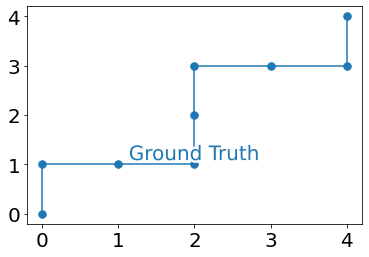

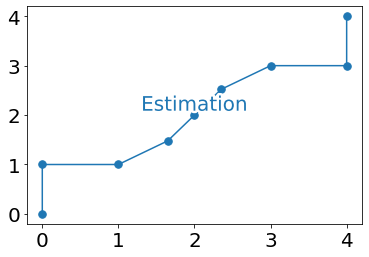

In [58]:
plt.rc('font',size=20)
plt.plot(x[:,0],x[:,1],marker = '.',markersize = 15,label='Ground Truth')
ll.labelLines(plt.gca().get_lines(),fontsize=20,zorder=3,yoffsets=0.2)
plt.show()

plt.plot(x_hat.value[:,0],x_hat.value[:,1],marker = '.',markersize = 15,label='Estimation')
ll.labelLines(plt.gca().get_lines(),fontsize=20,zorder=3,yoffsets=0.2,align=False)
plt.show()